# ANLY 590 Assignment 3

## 1 Autoencoder
A convolutional autoencoder is a particular flavor of autoencoder where we use convolutional layers instead of Dense layers. We have previously applied autoencoders to images using only Dense layers and the result worked fairly well. However, the local spatial correlations of images imply that we should be able to do better using convolutional layers instead of Dense layers.

Build and fit a convolutional autoencoder for the Fashion MNIST dataset. The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.

An example to guide your thinking can be found toward the bottom of this post https://blog.keras.io/building-autoencoders-in-keras.html. DO NOT JUST COPY THIS CODE AND TURN IT IN. BE CREATIVE, COME UP WITH YOUR OWN VARIATION.

After training your network, visualize some examples of input images and their decoded reconstruction.

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

import warnings
warnings.filterwarnings('ignore')

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.
/Users/shiqi_ning/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shiqi_ning/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shiqi_ning/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shiqi_ning/anaconda3/lib/python3.6

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [2]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [3]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs = 10,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test, x_test),
                callbacks=[TensorBoard(log_dir = '/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.3670 - val_loss: 0.3357
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.3228 - val_loss: 0.3189
Epoch 3/10
60000/60000 [==============================] - 57s 948us/step - loss: 0.3136 - val_loss: 0.3138
Epoch 4/10
60000/60000 [==============================] - 56s 926us/step - loss: 0.3078 - val_loss: 0.3081
Epoch 5/10
60000/60000 [==============================] - 57s 944us/step - loss: 0.3045 - val_loss: 0.3063
Epoch 6/10
60000/60000 [==============================] - 58s 964us/step - loss: 0.3025 - val_loss: 0.3081
Epoch 7/10
60000/60000 [==============================] - 58s 966us/step - loss: 0.3008 - val_loss: 0.3028
Epoch 8/10
60000/60000 [==============================] - 56s 935us/step - loss: 0.2993 - val_loss: 0.3011
Epoch 9/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2982 - val_loss: 

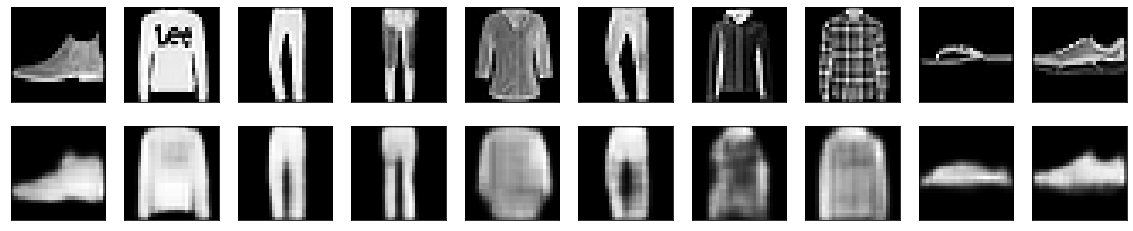

In [5]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2 Image Classification
We’ll continue to use the Fashion MNIST dataset and build a deep convolutional network for classification.

### 2.1 Deep CNN
Build a deep CNN to classify the images. Provide a brief description of the architectural choices you’ve made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model’s performance on training
set and test set.

**Description:** The neural network has 5 layers, 3 2D convolutional layers with 64 filters, (5, 5) kernel size, relu activation function, padding set as same and stride which equals 1. Then, there are 2 MaxPooling layers after the first two convolutional layers, with pooling size (2,2). After the first MaxPooling there is a dropout NN of 0.7. Finally, after the "Flatten" function, which is change the shape of the output, the output layer is densed with 10 classes. Softmax activation and categorical crossentropy are also used.

In [6]:
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

from keras.models import Sequential
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization


In [7]:
# Build Model
model = Sequential()

model.add(Conv2D(filters = 64,kernel_size=(5, 5), 
                 activation='relu', strides=(1, 1), 
                 padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 64,kernel_size=(5, 5), 
                 activation='relu', strides=(1, 1), 
                 padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))
model.add(Conv2D(filters = 64,kernel_size=(5, 5), 
                 activation='relu', strides=(1, 1), 
                 padding='same', input_shape=(28,28,1)))

model.add(Flatten())
model.add(Dense(84))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [8]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

y_train = np_utils.to_categorical(y_train, 10) # into to categorical, there are 10 categories in the dataset
y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Train Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN = model.fit(x_train, y_train, epochs = 5, verbose = True, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 167s 3ms/step - loss: 0.4759 - accuracy: 0.8256 - val_loss: 0.3316 - val_accuracy: 0.8762
Epoch 2/5
60000/60000 [==============================] - 157s 3ms/step - loss: 0.3403 - accuracy: 0.8738 - val_loss: 0.2912 - val_accuracy: 0.8953
Epoch 3/5
60000/60000 [==============================] - 159s 3ms/step - loss: 0.3116 - accuracy: 0.8838 - val_loss: 0.2935 - val_accuracy: 0.8951
Epoch 4/5
60000/60000 [==============================] - 162s 3ms/step - loss: 0.2936 - accuracy: 0.8904 - val_loss: 0.2918 - val_accuracy: 0.8946
Epoch 5/5
60000/60000 [==============================] - 168s 3ms/step - loss: 0.2827 - accuracy: 0.8939 - val_loss: 0.2937 - val_accuracy: 0.9004


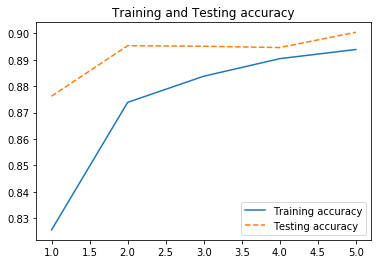

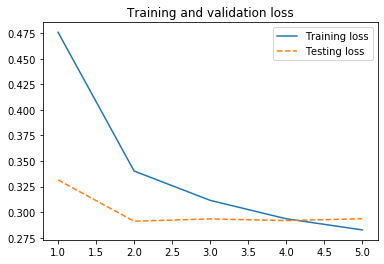

In [10]:
import matplotlib.pyplot as plt

acc = CNN.history['accuracy']
test_acc = CNN.history['val_accuracy']
loss = CNN.history['loss']
test_loss = CNN.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, test_acc, '--', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, test_loss, '--', label='Testing loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**The train accuracy is 0.89, the test accuracy is 0.90. The train loss is 0.28, the test loss is 0.29.**

### 2.2 Transfer Learning
Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on training set and test set.

In [15]:
import cv2
from keras.applications import VGG19, VGG16

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (64,64)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

x_test = [cv2.cvtColor(cv2.resize(i, (64,64)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')

# print shape
print(x_train.shape,y_train.shape)

(60000, 64, 64, 3) (60000,)


In [16]:
## build the model

model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
# Make vgg16 model layers as non trainable
for layer in model_vgg16_conv.layers:
    layer.trainable = False

input_img = Input(shape=(64,64,3))
output_vgg16_conv = model_vgg16_conv(input_img)

# Add fully-connected layers 
x = Flatten()(output_vgg16_conv)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

pretrained_model = Model(inputs=input_img, outputs=x)

## compile
pretrained_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## fit
pretrained_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1751s 29ms/step - loss: 0.5492 - accuracy: 0.8382 - val_loss: 0.3689 - val_accuracy: 0.8718
Epoch 2/2
60000/60000 [==============================] - 1788s 30ms/step - loss: 0.3241 - accuracy: 0.8838 - val_loss: 0.3745 - val_accuracy: 0.8772


**The best accuracy on training set is 0.88, the best accuracy on test set is 0.87.**

## 3 Text Classification

While images contain local spatial correlations and structure, many other datasets contain temporal correlations. Examples include time series and discrete sequences such as text. In this problem, we will tackle the task of text classification in the context of natural language.

**Background.** In this problem, we will build models that read short text segments (tweets) and identify if one or more specific topics are being discussed.

**Dataset.** The dataset consists of tweets along with labels for which topics were being referenced in the tweet. Examples of the topics include ”storms”,
”rain”, ”hurricane”, ”snow” and so on. Unlike previous classification problems we have encountered, in this dataset, there is not just a single right answer.
The labels here are derived from multiple annotators decided how to label each tweet, so a single tweet can be about more than one topic. The label is the
fraction of annotations for a given topic, and each row should sum to 1. 

What Loss function should you use here? Categorical CrossEntropy might work, but with some modification since we don’t have ”hard” labels over the categories. Another option might be sigmoid: for each output category, use a
sigmoid to collapse the output to between 0 and 1, but each category output can be roughly independent of the others. In the problems below, feel free to
try both.

### 3.1 RNN
Build and train a Recurrent Neural Network to solve this text classification task.
You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [32]:
# Load dataset
import pandas as pd
import re
from sklearn.model_selection import train_test_split

tweets = pd.read_csv("tweets_with_labels.csv",sep ="\t")
tweets.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [33]:
# preprocessing function
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

# preprocessing
corpus = list(tweets["tweet"])
X = [preprocess_text(sen) for sen in corpus]
y = tweets.drop(['id','tweet'],axis = 1).values

# split test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_feature = 10000 
max_len = 64 

tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train) 
test_sequences = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(train_sequences, maxlen=max_len)
X_test = pad_sequences(test_sequences, maxlen=max_len)

In [35]:
# Used LSTM to train the model
from keras.layers import LSTM,Embedding

model_RNN = Sequential()
model_RNN.add(Embedding(max_feature, 32))
model_RNN.add(LSTM(32))
model_RNN.add(Dense(15, activation ='softmax'))
model_RNN.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['acc'])
LSTM_history = model_RNN.fit(X_train, y_train, 
                            epochs = 5, 
                            batch_size = 128,
                            validation_data = (X_test, y_test), 
                            verbose = 1)

Train on 54562 samples, validate on 23384 samples
Epoch 1/5
54562/54562 [==============================] - 26s 475us/step - loss: 2.2229 - acc: 0.4934 - val_loss: 1.8371 - val_acc: 0.6277
Epoch 2/5
54562/54562 [==============================] - 25s 458us/step - loss: 1.6567 - acc: 0.7119 - val_loss: 1.5745 - val_acc: 0.7367
Epoch 3/5
54562/54562 [==============================] - 25s 467us/step - loss: 1.5271 - acc: 0.7641 - val_loss: 1.5105 - val_acc: 0.7580
Epoch 4/5
54562/54562 [==============================] - 42s 774us/step - loss: 1.4428 - acc: 0.7881 - val_loss: 1.5575 - val_acc: 0.7640
Epoch 5/5
54562/54562 [==============================] - 29s 527us/step - loss: 1.4072 - acc: 0.7942 - val_loss: 1.4799 - val_acc: 0.7794


**The best LSTM model has a train accuracy of 0.79, and a test set accuracy of 0.78.**

### 3.2 CNN
Build and train a 1D CNN for this text classification task. We recommend you
do a character-level convolution (with character embeddings). You might gain
some insight and inspiration from these text classification approaches:

• http://www.aclweb.org/anthology/D14-1181

• https://arxiv.org/abs/1702.08568

In [36]:
from keras.layers import Conv1D, GlobalMaxPooling1D

model_CNN = Sequential()
model_CNN.add(Embedding(max_feature, 64))
model_CNN.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(64,activation='relu'))
model_CNN.add(Dense(15,activation='sigmoid'))
model_CNN.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics=['acc'])
CNN_history = model_CNN.fit(X_train, y_train,
                            epochs = 5, batch_size = 60,
                            validation_data =(X_test, y_test), verbose=1)

Train on 54562 samples, validate on 23384 samples
Epoch 1/5
54562/54562 [==============================] - 17s 310us/step - loss: 1.7144 - acc: 0.6594 - val_loss: 1.2258 - val_acc: 0.7808
Epoch 2/5
54562/54562 [==============================] - 14s 258us/step - loss: 1.2894 - acc: 0.7823 - val_loss: 1.1511 - val_acc: 0.8053
Epoch 3/5
54562/54562 [==============================] - 13s 240us/step - loss: 1.2141 - acc: 0.7965 - val_loss: 1.1276 - val_acc: 0.8095
Epoch 4/5
54562/54562 [==============================] - 13s 243us/step - loss: 1.1676 - acc: 0.8030 - val_loss: 1.1127 - val_acc: 0.8108
Epoch 5/5
54562/54562 [==============================] - 13s 240us/step - loss: 1.1338 - acc: 0.8076 - val_loss: 1.1051 - val_acc: 0.8161


**The train set accuracy is 0.81, tge test set accuract is 0.82. The loss for train set is 1.13, the loss for the test set is 1.11**

### 3.3

Be sure to directly compare your two methods with an ROC curve or similar
validation method. Don’t forget to create a train-test split.

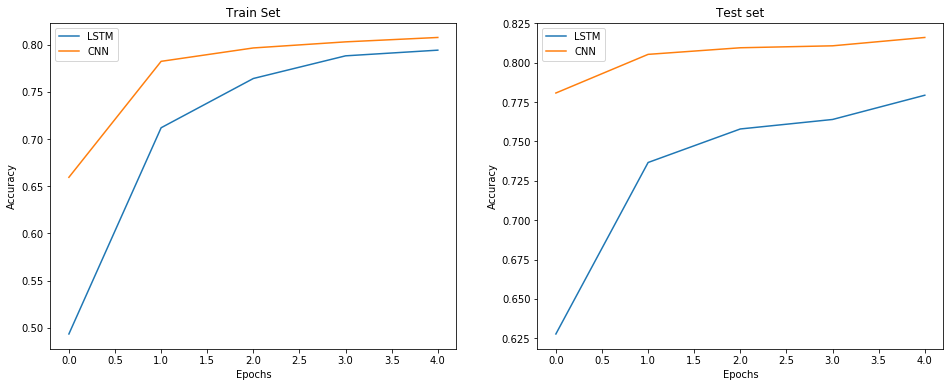

In [37]:
# Plot the results
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(LSTM_history.history['acc'])
plt.plot(CNN_history.history['acc'])
plt.title('Train Set')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['LSTM', 'CNN'])

plt.subplot(1, 2, 2)

plt.plot(LSTM_history.history['val_acc'])
plt.plot(CNN_history.history['val_acc'])
plt.title('Test set')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['LSTM', 'CNN'])
plt.show()

 **From the above plots, it is clear that CNN outperforms LSTM.**